<h1><center>Analysis of video game industry from 1980 to 2020</center></h1>

<p><center><img src="https://thumbs.gfycat.com/IncompleteHandsomeCapeghostfrog.webp" alt="intro kernel Loic Champlong"></center></p>


<p>This project aims at exploring the video industry from the <a href="https://www.kaggle.com/gregorut/videogamesales">Kaggle Dataset videogamesales</a>. This my first solo project in python. We are going to study the different specifications of this market and try to understand how to work. 
    
The dataset is composed of **10 columns**, regrouping: 

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Exploration of the dataframe

Before analyzing anything, we are first going to explore the dataframe and understand if there any mistakes (especially missing values). 

In [2]:
dataset = pd.read_csv('../input/videogamesales/vgsales.csv', index_col='Rank')
print(dataset.head())
print(dataset.info())

                          Name Platform    Year         Genre Publisher  \
Rank                                                                      
1                   Wii Sports      Wii  2006.0        Sports  Nintendo   
2            Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3               Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4            Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5     Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                           
1        41.49     29.02      3.77         8.46         82.74  
2        29.08      3.58      6.81         0.77         40.24  
3        15.85     12.88      3.79         3.31         35.82  
4        15.75     11.01      3.28         2.96         33.00  
5        11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.

Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool


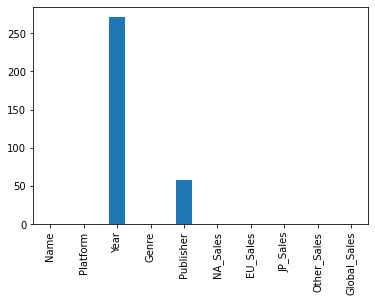

In [3]:
#Missing Values 

print(dataset.isna().any())

# Bar plot of missing values by variable
dataset.isna().sum().plot(kind="bar")

# Show plot
plt.show()

# Missing values
We are missiing values in the Year and Publisher columns. However, since we are not going to perform any Machine Learning techniques here (for example Linear Regression) and since the DataFrame is extremely large, those missing values do not represent an important amount and will not impact our analysis. We are going to leave it as it is. 

In [4]:
#How many platforms are there in the dataset? 

dataset_countplatforms = dataset['Platform'].nunique()
print("There are", dataset_countplatforms, "platforms.")

#How many videogames are there in the dataset? 

dataset_countnames = dataset['Name'].nunique()
print("There are", dataset_countnames, "games.")

#Years to years?

Year_Min = dataset['Year'].min()
Year_Max = dataset['Year'].max()
print("The dataset starts in:", Year_Min)
print("The dataset ends in:", Year_Max)

There are 31 platforms.
There are 11493 games.
The dataset starts in: 1980.0
The dataset ends in: 2020.0


              Global_Sales
Genre                     
Action             1751.18
Adventure           239.04
Fighting            448.91
Misc                809.96
Platform            831.37
Puzzle              244.95
Racing              732.04
Role-Playing        927.37
Shooter            1037.37
Simulation          392.20
Sports             1330.93
Strategy            175.12


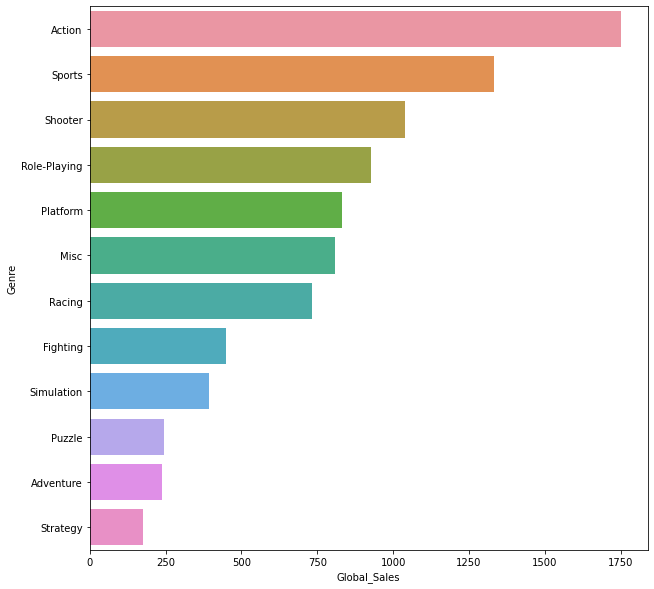

In [5]:
#Most popular genre in the dataset by Sum of Worldwide Sales

Grouped_Genre = dataset.pivot_table(values='Global_Sales',index='Genre', aggfunc='sum')
print(Grouped_Genre)
Grouped_Genre = Grouped_Genre.sort_values(by = 'Global_Sales',ascending  = False)

# Plot the data  
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(Grouped_Genre['Global_Sales'],Grouped_Genre.index, orient='h')
plt.show()

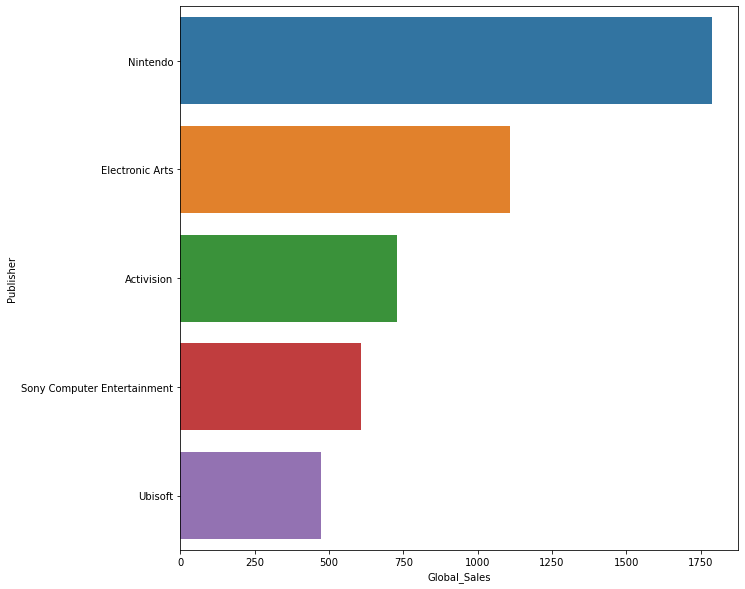

In [6]:
#5 best Publisher  

plt.rcParams['figure.figsize'] = (10,10)
Publisher_Sales  = dataset.pivot_table(index = 'Publisher' ,values = 'Global_Sales',aggfunc = np.sum)
Publisher_Sales  = Publisher_Sales.sort_values(by = 'Global_Sales',ascending  = False).head(5)
sns.barplot(Publisher_Sales['Global_Sales'],Publisher_Sales.index, orient='h')
plt.show()

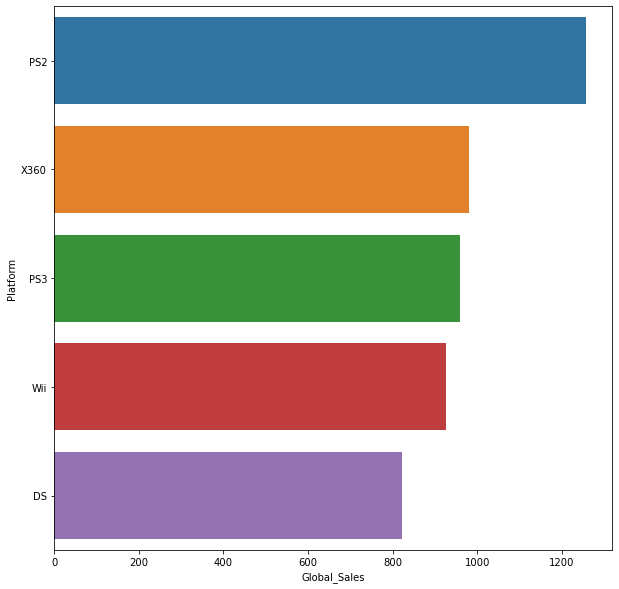

In [7]:
#5 Best Platform

plt.rcParams['figure.figsize'] = (10,10)
Platform_Sales  = dataset.pivot_table(index = 'Platform' ,values = 'Global_Sales',aggfunc = np.sum)
Platform_Sales  = Platform_Sales.sort_values(by = 'Global_Sales',ascending  = False).head(5)
sns.barplot(Platform_Sales['Global_Sales'],Platform_Sales.index, orient='h')
plt.show()

                                Global_Sales
Name                                        
Wii Sports                             82.74
Grand Theft Auto V                     55.92
Super Mario Bros.                      45.31
Tetris                                 35.84
Mario Kart Wii                         35.82
Wii Sports Resort                      33.00
Pokemon Red/Pokemon Blue               31.37
Call of Duty: Black Ops                31.03
Call of Duty: Modern Warfare 3         30.83
New Super Mario Bros.                  30.01


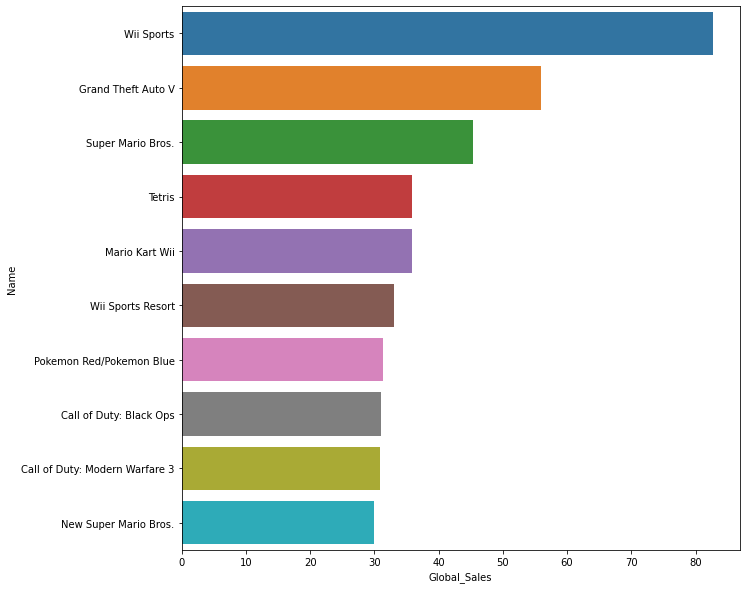

In [8]:
#Best games 

plt.rcParams['figure.figsize'] = (10,10)
Games_Sales  = dataset.pivot_table(index = 'Name' ,values = 'Global_Sales',aggfunc = np.sum)
Games_Sales  = Games_Sales.sort_values(by = 'Global_Sales', ascending  = False).head(10)
print(Games_Sales)
sns.barplot(Games_Sales['Global_Sales'],Games_Sales.index, orient='h')
plt.show()

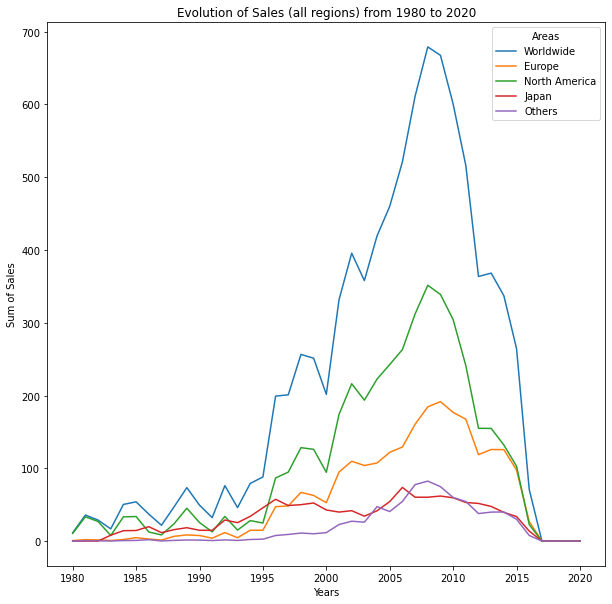

In [9]:
#Global Sales Evolution 

Global_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'Global_Sales',aggfunc = np.sum)
sns.lineplot(Global_Sales_Evolution.index, Global_Sales_Evolution['Global_Sales'])

#EU Sales Evolution 

EU_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'EU_Sales',aggfunc = np.sum)
sns.lineplot(EU_Sales_Evolution.index, EU_Sales_Evolution['EU_Sales'])

#NA Sales Evolution 

NA_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'NA_Sales',aggfunc = np.sum)
sns.lineplot(NA_Sales_Evolution.index, NA_Sales_Evolution['NA_Sales'])

#JP Sales Evolution 

JP_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'JP_Sales',aggfunc = np.sum)
sns.lineplot(JP_Sales_Evolution.index, JP_Sales_Evolution['JP_Sales'])

#Other Sales Evolution 

O_Sales_Evolution  = dataset.pivot_table(index = 'Year' ,values = 'Other_Sales',aggfunc = np.sum)
sns.lineplot(O_Sales_Evolution.index, O_Sales_Evolution['Other_Sales'])

plt.rcParams['figure.figsize'] = (10,10)
plt.legend(title='Areas', loc='upper right', labels=['Worldwide', 'Europe', 'North America', 'Japan', 'Others'])
plt.title("Evolution of Sales (all regions) from 1980 to 2020")
plt.ylabel("Sum of Sales")
plt.xlabel("Years")
plt.show()

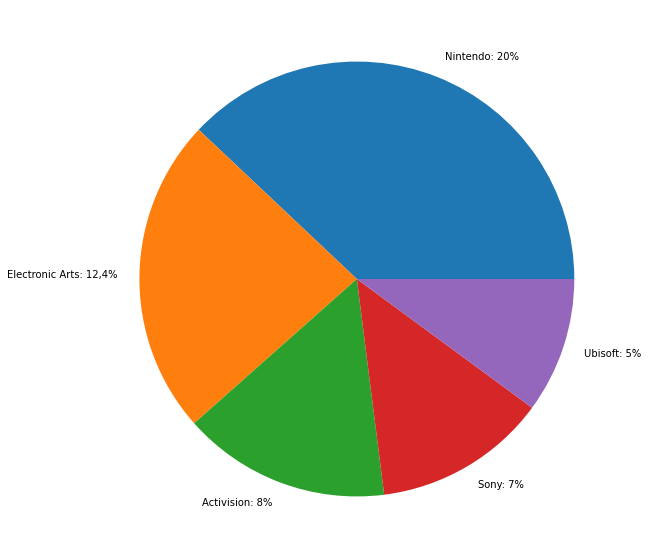

In [10]:
#Market Share Publishers 

All_Sales = dataset["Global_Sales"].sum()
Sales_Nintendo = dataset[dataset["Publisher"] == "Nintendo"]["Global_Sales"].sum() 
Sales_Nintendo = (Sales_Nintendo / All_Sales) * 100
Sales_Electronic_Arts = dataset[dataset["Publisher"] == "Electronic Arts"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Activision = dataset[dataset["Publisher"] == "Activision"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Sony = dataset[dataset["Publisher"] == "Sony Computer Entertainment"]["Global_Sales"].sum() * 100 / All_Sales
Sales_Ubisoft = dataset[dataset["Publisher"] == "Ubisoft"]["Global_Sales"].sum() * 100 / All_Sales
Market_Plot = [Sales_Nintendo, Sales_Electronic_Arts, Sales_Activision, Sales_Sony, Sales_Ubisoft]
plt.pie(Market_Plot, labels=['Nintendo: 20%', 'Electronic Arts: 12,4%', 'Activision: 8%', 'Sony: 7%', 'Ubisoft: 5%'])
plt.show()

In [11]:
#Nintendo 

Top_Nintendo_Game = dataset[dataset.Publisher == "Nintendo"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Nintendo_Game = Top_Nintendo_Game.set_index('Name')
Top_Nintendo_Game.columns.name = 'Nintendo'

print(Top_Nintendo_Game)

#Electronic Arts

Top_ElectronicArts_Game = dataset[dataset.Publisher == "Electronic Arts"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_ElectronicArts_Game = Top_ElectronicArts_Game.set_index('Name')
Top_ElectronicArts_Game.columns.name = 'Electronic Arts'
print(Top_ElectronicArts_Game)

#Activision 

Top_Activision_Game = dataset[dataset.Publisher == "Activision"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Activision_Game = Top_Activision_Game.set_index('Name')
Top_Activision_Game.columns.name = 'Activision'
print(Top_Activision_Game)

#Sony 

Top_Sony_Game = dataset[dataset.Publisher == "Sony Computer Entertainment"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Sony_Game = Top_Sony_Game.set_index('Name')
Top_Sony_Game.columns.name = 'Sony'
print(Top_Sony_Game)

#Ubisoft 

Top_Ubisoft_Game = dataset[dataset.Publisher == "Ubisoft"][["Name","Global_Sales"]].drop_duplicates(["Name"]).head(1)
Top_Ubisoft_Game = Top_Ubisoft_Game.set_index('Name')
Top_Ubisoft_Game.columns.name = 'Ubisoft'
print(Top_Ubisoft_Game)

Nintendo    Global_Sales
Name                    
Wii Sports         82.74
Electronic Arts  Global_Sales
Name                         
FIFA 16                  8.49
Activision                      Global_Sales
Name                                        
Call of Duty: Modern Warfare 3         14.76
Sony                    Global_Sales
Name                                
Gran Turismo 3: A-Spec         14.98
Ubisoft       Global_Sales
Name                      
Just Dance 3         10.26


In [12]:
#By Regions 

##Others

Sales_Others = dataset.groupby(['Name', 'Publisher', 'Platform'])['Other_Sales'].sum()
Sales_Others = Sales_Others.sort_values(ascending=False).head(5)
Sales_Others = Sales_Others.reset_index()

##JAPAN

Sales_INJapan = dataset.groupby(['Name', 'Publisher', 'Platform'])['JP_Sales'].sum()
Sales_INJapan = Sales_INJapan.sort_values(ascending=False).head(5)


##EUROPE 
Sales_INEU = dataset.groupby(['Name', 'Publisher', 'Platform'])['EU_Sales'].sum()
Sales_INEU = Sales_INEU.sort_values(ascending=False).head(5)
Sales_INEU = Sales_INEU.reset_index()

##North America 

Sales_INNA = dataset.groupby(['Name', 'Publisher', 'Platform'])['NA_Sales'].sum()
Sales_INNA = Sales_INNA.sort_values(ascending=False).head(5)
Sales_INNA = Sales_INNA.reset_index()

print(Sales_Others)
print(Sales_INJapan)
print(Sales_INEU)
print(Sales_INNA)

                            Name                    Publisher Platform  \
0  Grand Theft Auto: San Andreas         Take-Two Interactive      PS2   
1                     Wii Sports                     Nintendo      Wii   
2                 Gran Turismo 4  Sony Computer Entertainment      PS2   
3             Grand Theft Auto V         Take-Two Interactive      PS3   
4                 Mario Kart Wii                     Nintendo      Wii   

   Other_Sales  
0        10.57  
1         8.46  
2         7.53  
3         4.14  
4         3.31  
Name                           Publisher  Platform
Pokemon Red/Pokemon Blue       Nintendo   GB          10.22
Pokemon Gold/Pokemon Silver    Nintendo   GB           7.20
Super Mario Bros.              Nintendo   NES          6.81
New Super Mario Bros.          Nintendo   DS           6.50
Pokemon Diamond/Pokemon Pearl  Nintendo   DS           6.04
Name: JP_Sales, dtype: float64
                 Name             Publisher Platform  EU_Sales
0       